### Statistical test for SEFL mice
This notebook was created to analyze data for the R21 submitted with YP in June 2024
* 6/24/24 setup



In [1]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.7 MB/s eta 0:00:00


In [1]:
from os.path import join
import sys
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('paper')
import pingouin as pg

import datetime
%matplotlib inline

In [14]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from google.colab import drive
drive.mount('/content/drive')

save_dir = '/content/drive/Shareddrives/Turi_lab/Data/PTSD_project/!analysis/saveFolder/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading data

In [17]:
df = pd.read_csv(join(save_dir,'R21_2024_PTSD', 'filtered_adult_nonELS_mice_2024-06-24.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         213 non-null    int64  
 1   freezing           213 non-null    float64
 2   genotype           213 non-null    object 
 3   id                 213 non-null    object 
 4   day                213 non-null    object 
 5   condition          213 non-null    object 
 6   sex                213 non-null    object 
 7   cohort             213 non-null    object 
 8   exposure_mins      213 non-null    float64
 9   analyzed_duration  213 non-null    float64
 10  date               213 non-null    object 
 11  time               213 non-null    object 
 12  els                213 non-null    object 
 13  psilocybin         213 non-null    object 
 14  cohort_id          213 non-null    object 
 15  dob                213 non-null    object 
 16  age_at_SEFLA       213 non

 #### All mice seflb and recall sessions

Text(0.5, 1.0, 'Freezing stats (N=33)')

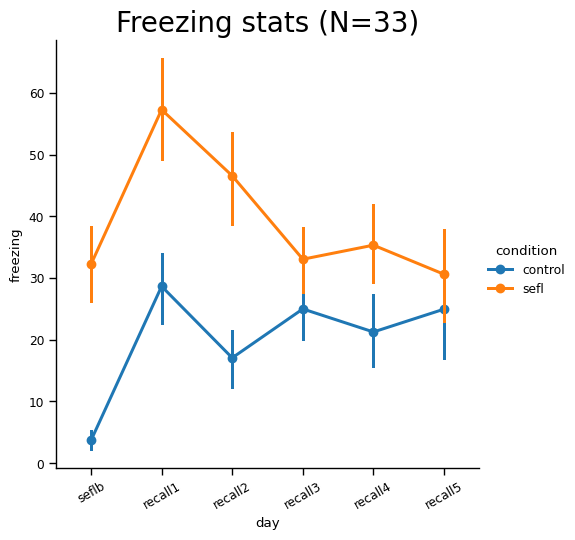

In [19]:
sessions = ['seflb', 'recall1', 'recall2', 'recall3', 'recall4', 'recall5']
anova_df = df[df['day'].isin(sessions)]
g = sns.catplot(data=anova_df, kind='point', x='day',
                y='freezing', hue='condition')
g.set_xticklabels(rotation=30)
plt.title(f'Freezing stats (N={anova_df.cohort_id.nunique()})',
          fontsize=20)

In [7]:
# print(anova_df.groupby('condition')['cohort_id'].nunique(), '\n')

# # picking equal amount of mice from sefl group
# sefl_id = anova_df[anova_df['condition']=='sefl']['cohort_id'].unique()
# rand_mice = np.random.choice(sefl_id, size=34, replace=False)
# print(f'random mice: {len(rand_mice)}\n')

# df_equal = pd.concat([anova_df[anova_df['condition']=='control'],
#                       anova_df[anova_df['cohort_id'].isin(rand_mice)]])
# print(df_equal.groupby('condition')['cohort_id'].nunique(), '\n')

# g = sns.catplot(data=df_equal, kind='point', x='day',
#                 y='freezing', hue='condition')
# g.set_xticklabels(rotation=30)
# plt.title(f'Stat  (N={df_equal.cohort_id.nunique()})')
# # g.savefig(join(save_dir, 'noELS', 'Freezing_sefl_vs_ctl_stats.png'),
# #           dpi=300, transparent=True, box_inches='tight',
# #           figsize=(5,5))

In [20]:
#########
# mixed #
#########
df = anova_df
res = pg.mixed_anova(dv='freezing', between='condition', within='day',
                     subject='cohort_id',data=df)
res.round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,6017.31925,1,14,6017.31925,8.61526,0.01086,NaN,0.38095,NaN,NaN,NaN,NaN
1,day,6518.85466,5,70,1303.77093,8.87610,0.00000,0.00042,0.38801,0.55276,False,0.13066,0.02314
2,Interaction,2261.67229,5,70,452.33446,3.07950,0.01434,NaN,0.18030,NaN,NaN,NaN,NaN
